# PS1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as spy
from scipy import linalg
from numpy import linalg

def g2_schmidt(mat):
    m,n = mat.shape
    mat = mat.astype(float)
    Q = np.matrix(np.copy(mat))
    R = np.matrix(np.zeros((n,n)))
    for i in range(n):
        R[i,i]= spy.linalg.norm(Q[:,i])
        Q[:,i] =  Q[:,i]/R[i,i]
        for j in range(i+1,n):
            X = Q[:,j]
            Y = X.T
            Z = Q[:,i]
            R[i,j]=  Y@Z
            Q[:,j] = X - R[i,j]*Z
    return Q,R

In [2]:
Y = np.random.rand(4,4)
M=np.array([1.0,1.0,0,1.0,0,1.0,0,1.0,1.0]).reshape(3,3)
def det_mat(X):
    return np.prod(np.diag(g2_schmidt(X)[1]))
det_mat(M)


1.9999999999999998

In [3]:

def back_substitution(A, b):
    n = b.size
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        solv = b[i]
        for j in range(i+1, n):
            solv = solv - A[i,j] * x[j]
        x[i] = solv / A[i,i]
    return x


def solve_linear(A,b):
    Q,R = g2_schmidt(A)
    y = Q.T@b
    return back_substitution(R,y)

A=np.array( [2,3,4,9,-4,30,1,1,-1])
A =A.reshape((3,3))
A = np.matrix(A)
b =np.array([38,161,2])
b = np.matrix(b.reshape(3,1))


wer = solve_linear(A,b)
print(wer.tolist())


[[2.999999999999967], [4.000000000000005], [5.000000000000011]]


In [4]:
def Householder(A):
    m,n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n):
        u = np.copy(R[k:,k])
        sign = lambda x: 1 if  x >=0 else -1
        u[0]= u[0] + sign(u[0])*spy.linalg.norm(u)
        u = u/spy.linalg.norm(u)
        R[k:,k:] = R[k:,k:] - 2*np.outer(u, u.T@R[k:,k:])
        Q[k:,:] = Q[k:,:] - 2*np.outer(u, u.T@Q[k:,:])
    return Q.T,R

A = np.random.random((5, 3))
Q,R = spy.linalg.qr(A) # Get the full QR decomposition.
print(A.shape, Q.shape, R.shape)
np.allclose(Q @ R, A)

M,N = Householder(A)
print(A.shape, M.shape, N.shape)
np.allclose(M@N,A)

(5, 3) (5, 5) (5, 3)
(5, 3) (5, 5) (5, 3)


True

In [5]:
def Hessenberg(A):
    m,n = A.shape
    H = np.copy(A)
    Q = np.eye(m)
    for k in range(n-2):
        u = np.copy(H[k+1:,k])
        sign = lambda x: 1 if  x >=0 else -1
        u[0]= u[0] + sign(u[0])*spy.linalg.norm(u)
        u = u/spy.linalg.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2*np.outer(u, u.T@H[k+1:,k:])
        H[:,k+1:] = H[:,k+1:] - 2*np.outer(H[:,k+1:]@u,u.T)
        Q[k+1:,:] = Q[k+1:,:] - 2*np.outer(u, u.T@Q[k+1:,])
    return H,Q.T

A = np.random.random((10, 10))
H,Q = spy.linalg.hessenberg(A, calc_q =True)

np.allclose(np.triu(H,-1),H)
HH,QQ = Hessenberg(A)
np.allclose(QQ@HH@QQ.T,A)

True

# PS2

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as spy
from scipy import linalg

def g2_schmidt(mat):
    m,n = mat.shape
    mat = mat.astype(float)
    Q = np.matrix(np.copy(mat))
    R = np.matrix(np.zeros((n,n)))
    for i in range(n):
        R[i,i]= spy.linalg.norm(Q[:,i])
        Q[:,i] =  Q[:,i]/R[i,i]
        for j in range(i+1,n):
            X = Q[:,j]
            Y = X.T
            Z = Q[:,i]
            R[i,j]=  Y@Z
            Q[:,j] = X - R[i,j]*Z
    return Q,R

def back_substitution(A, b):
    n = b.size
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        solv = b[i]
        for j in range(i+1, n):
            solv = solv - A[i,j] * x[j]
        x[i] = solv / A[i,i]
    return x


def solve_linear(A,b):
    Q,R = np.linalg.qr(A)
    y = Q.T@b
    return linalg.solve_triangular(R, y)

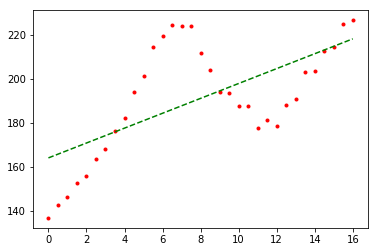

In [7]:
housing =  np.load("housing.npy")
Year = np.array(housing[:,0])
Index = np.array(housing[:,1])
one = np.ones(len(Year))
A = np.vstack((Year,one)).T
plt.plot(Year, Index,"r.")
Z = solve_linear(A, Index)
m = Z[0]*Year + Z[1]
plt.plot(Year, m ,"g--")

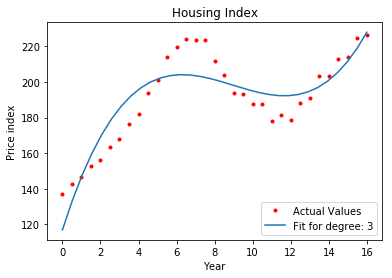

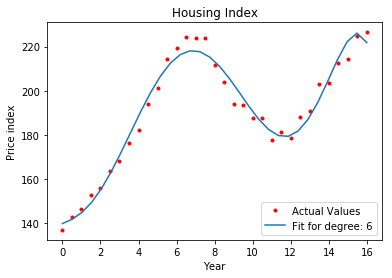

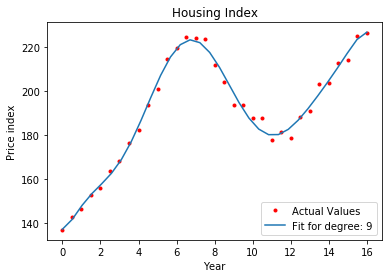

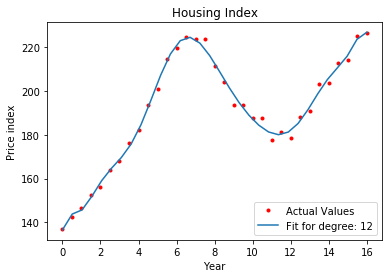

In [8]:
def polyfit(x,y, degree):
    A = np.vander(x, degree+1)
    least_s = solve_linear(A,y)
    poly  = np.poly1d(least_s)
    return least_s, poly

year_grid = np.linspace(0,16,32)
for i in[3,6,9,12]:
    plt.plot(Year, Index,'r.' ,label = "Actual Values")
    plt.plot(year_grid, polyfit(Year,Index, i)[1](year_grid), label = ("Fit for degree: " + str(i))  )
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Price index")
    plt.title("Housing Index")
    plt.show()

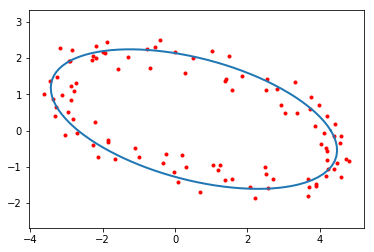

In [9]:
ellip = np.load("ellipse.npy")
ellip
x = ellip[:,0]
y = ellip[:,1]
b = np.ones_like(x)
A = np.column_stack((x**2,x,x*y,y,y**2))
solv = solve_linear(A,b)
    
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, label = "Best fit ellipse")
    plt.gca().set_aspect("equal", "datalim")

plt.plot(x,y,'r.')
plot_ellipse(solv[0],solv[1],solv[2],solv[3],solv[4])

In [14]:
import cmath
def dom_eig(A,N,tol):
    m,n = A.shape
    x= np.zeros((n,N+1))
    x[:,0]= np.random.random((n))
    x[:,0]= x[:,0]/spy.linalg.norm(x[:,0])
    iter = 0
    while iter <N:
        x[:,iter+1]= A@x[:,iter]
        x[:,iter+1] = x[:,iter+1]/spy.linalg.norm(x[:,iter+1])
        if spy.linalg.norm(x[:,iter+1]-x[:,iter])<tol:
            return x[:,iter+1].T@A@x[:,iter+1],x[:,iter+1]
        else:
            iter += 1
    return x[:,N].T@A@x[:,N],x[:,N]

A = np.random.random((4,4))
# Compute the eigenvalues and eigenvectors of A via SciPy.
# eigs, vecs = spy,linalg.eig(A)
# loc = np.argmax(eigs)
# lambo,xo = eigs[loc], vecs[:,loc]
# print(lambo,xo)
lambc,xc = dom_eig(A,10000,1e-12)
print(lambc,xc)
# Verify that Ax = lambda x.
# np.allclose(lambo * x, lambc * x)
        

2.0969082400725956 [0.68899512 0.50574488 0.31578531 0.41205276]


In [ ]:
def qr_eigen(A,N,tol):
    m,n = A.shapecolu
    S =  spy.linalg.hessenberg(A)
    for k in range(N):
        Q,R = spy.linalg.qr(S)
        S= R@Q
    eig =[]*n
    iter = 0
    while iter <n:
        if (iter == n-1 or np.abs(S[iter+1,iter])<tol):
            eig.append(S[iter,iter])
        else:
            a = S[i,i]
            b = S[i,i+1]
            c = S[i+1,i]
            d = S[i+1,i+1]
            A =1
            B = -1*(a+d)
            C = a*d-b*c
            root1 = (-B- cmath.sqrt(B**2- 4*A*C))/(2*A)
            eig.append(root1)
            root2 = (-B+ cmath.sqrt(B**2- 4*A*C))/(2*A)
            eig.append(root2)
        iter += 1
    return eig


A = np.random.random((2,2))
B =qr_eigen(A+A.T,1000,.001)
print(B)
Q = spy.linalg.eig(A+A.T)
print(Q[1])
Q[1][1]

# PS3

In [ ]:
import cmath
def compact_svd(A,tol):
    m,n = A.shape
    lamb, V = spy.linalg.eig(A.conj().T@A)
    sigma =  np.sqrt(lamb)
    index =  np.argsort(sigma)
    index = index[::-1]
    sigma = sigma[index]
    V = V[:,index]
    r =  len(sigma[sigma!=0])
    sigma1 = sigma[:r]
    V1 = V[:,:r]
    U1 = np.zeros((m,r))
    for i in range(r):
        U1[:,i] = (A@V1[:,i])/(sigma1[i]) 
    sigma1 = sigma1*np.eye(r)
    return U1,sigma1,V1.conj().T

A = np.random.random((20,18))
B = compact_svd(A,1e-8)
print(B[1])
UI = spy.linalg.svd(A)
print(UI[1])

In [ ]:
theta = np.linspace(0, 2*np.pi, 200)
cos_t, sin_t = np.cos(theta), np.sin(theta)
S = np.vstack([[cos_t],[sin_t]])
e1 = [1,0,0]
e2 = [0,0,1]
E = np.vstack((e1,e2))
A=  np.array([[3,1],[1,3]])
U,sigma,V_H = spy.linalg.svd(A)
sigma = sigma*np.eye(2)
# sigh = spy.linalg.inv(U)@A@spy.linalg.inv(V_H)
# print(sigh)
fig,ax = plt.subplots(2,2)
ax[0,0].plot(cos_t,sin_t,'r')
ax[0,0].plot(e1,e2,'g')
ax[0,0].axis("equal")

vs = V_H@S
es = V_H@E
ax[0,1].plot(vs[0],vs[1], 'r')
ax[0,1].plot(es[0],es[1], 'g')
ax[0,1].axis("equal")


sigvs =  sigma@V_H@S
siges = sigma@V_H@E
ax[1,0].plot(sigvs[0],sigvs[1], 'r')
ax[1,0].plot(siges[0],siges[1], 'g')
# ax[1,0].axis("equal")

a_s = A@S
e_s = A@E
ax[1,1].plot(a_s[0],a_s[1], 'r')
ax[1,1].plot(e_s[0],e_s[1], 'g')
# ax[1,1].axis("equal")

In [ ]:
def trunc_svd(A,s):
    m,n = A.shape
    if s > np.linalg.matrix_rank(A) :
        raise ValueError("s has to be less than the rank of A")
    U,sigma,VH = spy.linalg.svd(A,1e-8)
    sigma = sigma*np.eye(np.linalg.matrix_rank(A))
    U_t = U[:,s] 
    sigma_t = sigma[:s,:s]
    VH_t = VH[:s,:]
    return U_t.size + np.sqrt(sigma_t.size) + VH_t.size

A = np.random.random((100,67))
print(type(A))
print(type(A[1,1]))
trunc_svd(A,15)

In [ ]:
def trunc_svd_mod(A,eps):
    m,n = A.shape 
    print(m,n)
    U,sigma,VH = compact_svd(A,1e-8)
    print(U.shape,sigma.shape,VH.shape)
    sig = np.sqrt(np.diag(sigma))
    print(np.min(sig))
    if eps  < np.min(sig):
        raise ValueError("tolerance value too low ")
    index = np.argmax(sig<eps)
    print(index)
    s = index
    U_t = U[:,s] 
    sigma_t = sigma[:s,:s]
    VH_t = VH[:s,:]
    return U_t.size + np.sqrt(sigma_t.size) + VH_t.size

A = np.random.random((100,67))
trunc_svd_mod(A,1.4)


In [ ]:
A = np.random.random((10,1))
A = A-0.2
print(A)
print(np.min(A))
x = np.argmax(A<0)
print(x)

In [ ]:
def trunc_svd(A,s):
    m,n = A.shape
    print(s)
    if s > np.linalg.matrix_rank(A) :
        raise ValueError("s has to be less than the rank of A")
    print("reached here1")
    U,sigma,VH = compact_svd(A,1e-8)
    print("reached here2")
    sigma = sigma*np.eye(np.linalg.matrix_rank(A))
    U_t = U[:,:s] 
    sigma_t = sigma[:s,:s]
    VH_t = VH[:s,:]
    print(U_t.shape,sigma_t.shape,VH_t.shape)
    size_t = U_t.size + np.sqrt(sigma_t.size) + VH_t.size
    return U_t,sigma_t,VH_t,size_t

def image_comp(s):
    image_h = plt.imread("hubble.jpg")/255
    print(image_h[:10,:10,0])
    if len(image_h)== 2:
        U,sigma,VH = trunc_svd(image_h,s)
    else:
        r = image_h[:,:,0]
        print(r.shape,s)
        g = image_h[:,:,1]
        b = image_h[:,:,2]
        print(type(s))
        print(type(r[1,1]))
        X = trunc_svd(r,s)
        Y = trunc_svd(g,s)
        Z = trunc_svd(b,s)
        print(X[0].shape,X[1].shape,X[2].shape )
        Ar =  X[0]@X[1]@X[2]
        Ag =  Y[0]@Y[1]@Y[2]
        Ab = Z[0]@Z[1]@Z[2]
        As = np.dstack((Ar,Ag,Ab))
        As = np.clip(As, 0, 1)
        B = As.astype(float)
        B = B*255
        B = B.astype(int)
        plt.imshow(B)
        

image_comp(20)

In [20]:
def dr_check(A,k,AD):
    if np.allclose(A@AD, AD@A):
        p1=1
    if np.allclose(np.linalg.matrix_power(A,k+1)@AD, np.linalg.matrix_power(A,k)):
        p2 =1
    if  np.allclose(AD@A@AD,AD):
        p3 = 1
    if p1 ==1 and p2 == 1 and p3 ==1:
        return True
    else:
        return False


# A =  np.matrix([[1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]])
# AD = np.matrix([[1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]])
# print(A.shape, type(A))
# k=1
# dr_check(A,k,AD)

B = np.matrix([[1,1,3],[5,2,6],[-2,-1,-3]])
BD = np.zeros((3,3))
k= 3
dr_check(B,k,BD)

True

In [21]:
def drazin(A,tol):
    n,n = A.shape
    f = lambda x: abs(x)>tol
    g = lambda x: abs(x)<=tol
    Q1,S,k1 = spy.linalg.schur(A, sort =f)
    Q2,T,k2 = spy.linalg.schur(A, sort =g)
    U = np.column_stack((S[:,:k1], T[:,:k2]))
    Uinv = spy.linalg.inv(U)
    V =  Uinv@A@U
    Z = np.zeros((n,n),dtype =float)
    if k1 !=0:
        Minv = spy.linalg.inv(V[:k1,:k1])
        Z[:k1,:k1] = Minv
    return U@Z@Uinv

drazin(A,.3)
drazin(B,.2)
C = np.matrix([[-3,0],[3,3]])
drazin(C,.2)

array([[-0.33333333,  0.        ],
       [ 0.33333333,  0.33333333]])

In [22]:
#Create graphs

AG1  = np.matrix([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])
AG2 =np.matrix([[0,1],[1,0]])
AG3 = np.matrix([[0,1,1],[1,0,1],[1,1,0]])
AG4 =  np.matrix([[0,3],[3,0]])
AG5 = np.matrix([[0,2],[2,0]])
AG6 = np.matrix([[0,4],[4,0]])

# DG1 = list(np.sum(AG1, axis = 0))
# DG1 = np.matrix(DG1*np.eye(AG1.shape[0]))
# # print(DG1)
# DG2= list(np.sum(AG2, axis = 0))
# DG2 = DG2*np.eye(AG2.shape[0])

# DG3= list(np.sum(AG3, axis = 0))
# DG3 = DG3*np.eye(AG3.shape[0])

# DG4= list(np.sum(AG4, axis = 0))
# DG4 = DG4*np.eye(AG4.shape[0])

# DG5= list(np.sum(AG5, axis = 0))
# DG5 = DG5*np.eye(AG5.shape[0])

# DG6= list(np.sum(AG6, axis = 0))
# DG6 = np.matrix(DG6*np.eye(AG6.shape[0]))

# print(AG6- DG6)

In [23]:
def effec_res(A):
    n,n = A.shape
    degree = list(np.sum(A, axis = 0))
    degree = np.matrix(degree* np.eye(A.shape[0]))
    laplace = degree-A
    laplace.shape
    X = np.eye(n)
    R = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            lplace = np.copy(laplace)
            lplace[j,:]= 0
            lplace[j,j] =1
            if i != j:
                R[i,j] = drazin(lplace,0.01)[i,i]
            else:
                R[i,j] =0
    return R
effec_res(AG6)

array([[0.  , 0.25],
       [0.25, 0.  ]])

In [67]:
sn_data =  pd.read_csv("social_network.csv", header = None)
data = np.unique(np.concatenate((sn_data[0],sn_data[1])))
# x, index =  np.unique(data, return_inverse = True)
names = data
adj_size = data.shape[0]
adj=  np.zeros((adj_size,adj_size))
for i in sn_data.index:
    n_1 = sn_data.loc[i][0]
    n_2 = sn_data.loc[i][1]
    k =  np.argwhere(names == n_1)
    m =  np.argwhere(names == n_2)
    adj[k,m] = 1
    adj[m,k] = 1
res_sn =  effec_res(adj)


def predict_link(node=None):
        R = res_sn .copy()
        linked = np.argwhere(adj == 1)  #locate pairs of connected people
        R[linked[:, 0], linked[:, 1]] = np.inf  #set resistance between these pairs to 0
        if node is None:
            min_r = np.min(R)
            loc = np.argwhere(R == min_r)
            link = (names[loc[0]], names[loc[1]])
        elif type(node) == str:
            if node not in names:
                raise ValueError('Not in network')
            index = np.argwhere(names == node)[0]
            min_r = np.min(R[index])
            loc = np.argwhere(R[index] == min_r)
            link = (self.names[index], self.names[loc[0]])
        return link

predict_link()   
#     def add_link(self, node1, node2):
#         if (node1 not in self.names) or (node1 not in self.names):
#             raise ValueError("Not in network")
#         else:
#             i = np.argwhere(self.names == node1)
#             j = np.argwhere(self.names == node2)
#             self.adjacency[i, j], self.adjacency[j, i] = 1, 1
#             self.resistance = find_resistance(self.adjacency)


(array(['Abigail', 'Abigail'], dtype=object),
 array(['Alan', 'Alan'], dtype=object))

# PS4

In [252]:
def create_adj(filename,N):
    adj =  spy.sparse.dok_matrix((N,N))
    with open(filename, 'r') as myfile:
        for line in myfile:
            try:
                m,n =  line.strip().split()
                adj[int(m),int(n)] = 1
#                 print(adj[m,n])
            except:
                pass
    return adj

In [255]:
ADJ =(create_adj("matrix.txt",8))
B =ADJ.todense()
B

matrix([[0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]])

In [339]:
A = np.array([[ 0, 0, 0, 0, 0, 0, 0, 1],
[ 1, 0, 0, 0, 0, 0, 0, 0],
[ 0, 0, 0, 0, 0, 0, 0, 0],
[ 1, 0, 1, 0, 0, 0, 1, 0],
[ 1, 0, 0, 0, 0, 1, 1, 0],
[ 1, 0, 0, 0, 0, 0, 1, 0],
[ 1, 0, 0, 0, 0, 0, 0, 0],
[ 1, 0, 0, 0, 0, 0, 0, 0]])

In [421]:
def get_K(A):
    A[np.all(A == 0, axis=1)] =1
    diag =  np.sum(A,axis = 1)
    diag = diag.reshape(len(diag),1) 
    k =  A/diag
    return np.array(k.T)

print(get_K(A))

[[0.         1.         0.125      0.33333333 0.33333333 0.5
  1.         1.        ]
 [0.         0.         0.125      0.         0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.33333333 0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.         0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.         0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.         0.33333333 0.
  0.         0.        ]
 [0.         0.         0.125      0.33333333 0.33333333 0.5
  0.         0.        ]
 [1.         0.         0.125      0.         0.         0.
  0.         0.        ]]


In [430]:
A = np.array([[ 0, 0, 0, 0, 0, 0, 0, 1],
[ 1, 0, 0, 0, 0, 0, 0, 0],
[ 0, 0, 0, 0, 0, 0, 0, 0],
[ 1, 0, 1, 0, 0, 0, 1, 0],
[ 1, 0, 0, 0, 0, 1, 1, 0],
[ 1, 0, 0, 0, 0, 0, 1, 0],
[ 1, 0, 0, 0, 0, 0, 0, 0],
[ 1, 0, 0, 0, 0, 0, 0, 0]])

def get_K(A):
    A[np.all(A == 0, axis=1)] =1
    diag =  np.sum(A,axis = 1)
    diag = diag.reshape(len(diag),1) 
    k =  A/diag
    return np.array(k.T)

def it_page(Adj, d=0.85, N= None,tol= 1e-5):
    if N != None:
        Adj = np.triu(Adj)
    n,n = Adj.shape
    K = get_K(Adj)
    one = np.ones((n,1))
    newp = lambda p: d * K @ p + (1 - d) / n * one
    dist = 2
    x = np.random.random(n)
    p = x/np.sum(x)
    p = p.reshape((8,1))
    print(p.shape)
    while (dist > tol):
        p_new = newp(p)
        dist = spy.linalg.norm(p_new- p)
        p=  p_new
    return p
it_page(A)    

(8, 1)


array([[0.43868968],
       [0.02171029],
       [0.02786154],
       [0.02171029],
       [0.02171029],
       [0.02786154],
       [0.04585394],
       [0.39460245]])

In [454]:
A = np.array([[ 0, 0, 0, 0, 0, 0, 0, 1],
[ 1, 0, 0, 0, 0, 0, 0, 0],
[ 0, 0, 0, 0, 0, 0, 0, 0],
[ 1, 0, 1, 0, 0, 0, 1, 0],
[ 1, 0, 0, 0, 0, 1, 1, 0],
[ 1, 0, 0, 0, 0, 0, 1, 0],
[ 1, 0, 0, 0, 0, 0, 0, 0],
[ 1, 0, 0, 0, 0, 0, 0, 0]])
print(A.shape)
def it_page2(Adj, N = None, d = .85, tol = 1e-5):
    if N != None:
        Adj = np.triu(Adj)
    n,n = Adj.shape
    K = get_K(Adj)
    X = d * K+ (1 - d) / n * np.ones((n,n))
    print(X)
    eig,eigvec = spy.linalg.eig(X)
    return eig,eigvec

it_page2(A)

(8, 8)
[[0.01875    0.86875    0.125      0.30208333 0.30208333 0.44375
  0.86875    0.86875   ]
 [0.01875    0.01875    0.125      0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.01875    0.125      0.30208333 0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.01875    0.125      0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.01875    0.125      0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.01875    0.125      0.01875    0.30208333 0.01875
  0.01875    0.01875   ]
 [0.01875    0.01875    0.125      0.30208333 0.30208333 0.44375
  0.01875    0.01875   ]
 [0.86875    0.01875    0.125      0.01875    0.01875    0.01875
  0.01875    0.01875   ]]


(array([ 1.00000000e+00+0.j, -8.50000000e-01+0.j,  2.34581420e-01+0.j,
        -8.01930493e-18+0.j, -1.28331420e-01+0.j, -3.33985654e-09+0.j,
         3.33985629e-09+0.j,  1.49805774e-17+0.j]),
 array([[-7.38129111e-01, -7.07106781e-01,  2.36517595e-01,
         -9.45845122e-17, -1.29826927e-01, -2.77839441e-09,
          2.77839403e-09, -1.86179804e-16],
        [-3.65289622e-02, -1.34279237e-17, -6.90741279e-02,
          7.43164024e-17, -3.36643472e-01, -6.33651151e-17,
         -6.27459965e-17, -4.65449510e-17],
        [-4.68788348e-02,  5.19790593e-18, -1.52503595e-01,
         -1.35120732e-16,  4.06606445e-01, -1.34161603e-16,
         -1.38041192e-16, -1.39634853e-16],
        [-3.65289622e-02, -8.23001773e-18, -6.90741279e-02,
         -1.35120732e-17, -3.36643472e-01, -1.72350408e-17,
         -1.25491993e-17, -1.74543566e-17],
        [-3.65289622e-02, -1.29947648e-18, -6.90741279e-02,
          0.00000000e+00, -3.36643472e-01, -6.30315987e-17,
         -6.27459965e-17,  0.0

# PS5

In [77]:
def calc_condn(A):
    sigma = spy.linalg.svd(A)[1]
    if np.min(sigma) == 0:
        return np.inf
    else:
        return np.max(sigma)/np.min(sigma)

A = np.random.random((20,20))
print(calc_condn(A))
B = np.linalg.cond(A)
print(B)
Q = spy.linalg.qr(A)[0]
print(calc_condn(Q))

166.22329532055903
166.22329532055875
1.0000000000000007


Absolute k average: 4.818829631602951
Relative k average: 3.3258983264186045e+18


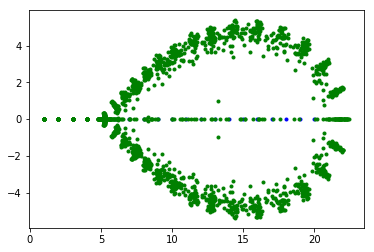

In [172]:
import sympy as sy
# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)
# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
plt.plot(np.real(w_roots),np.imag(w_roots), 'b.')
iter = 0
k = np.zeros(100)
rk = np.zeros(100)
while iter < 100:
    r = np.random.normal(1,1e-10,21)
    new_coeffs = w_coeffs*r
    new_roots = np.roots( np.poly1d(new_coeffs))
    plt.plot(np.real(new_roots),np.imag(new_roots), 'g.')
    w_roots = np.sort(w_roots)
    new_roots = np.sort(new_roots)
    k[iter] = spy.linalg.norm(new_roots - w_roots, np.inf) / spy.linalg.norm(r, np.inf)
    rk[iter] = k[iter] * spy.linalg.norm(w_coeffs, np.inf) / spy.linalg.norm(w_roots, np.inf)
    iter = iter+1
print("Absolute k average:", np.mean(k))
print("Relative k average:", np.mean(rk))

In [298]:
def eig_cond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    p_A = A+H
    lamb_d = spy.linalg.eigvals(p_A) - spy.linalg.eigvals(A)
    k_abs=   spy.linalg.norm(lamb_d)/spy.linalg.norm(H)
    k_rel = k_abs*spy.linalg.norm(A)/spy.linalg.norm(spy.linalg.eigvals(A))
    return k_rel
A = np.random.random((20,20))
eig_cond(A)

1606047662.1241746

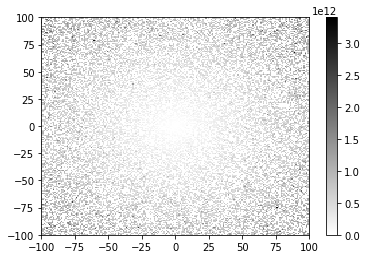

In [136]:
def res_grid(xmi,xma,ymi,yma,res):
    x = np.linspace(xmi,xma,res)
    y = np.linspace(ymi,yma,res)
    X,Y = np.meshgrid(x,y)
    K = np.zeros_like(Y)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            a1 = X[i,j]
            b1 = Y[i,j]
            A = np.array([1,a1, b1,1]).reshape(2,2)
            K[i,j] = eig_cond(A)
    plt.pcolormesh(X,Y,K,cmap = "gray_r")
    plt.colorbar()
res_grid(-100,100,-100,100,200)

(371.2445566661424, 4.46949638388164)

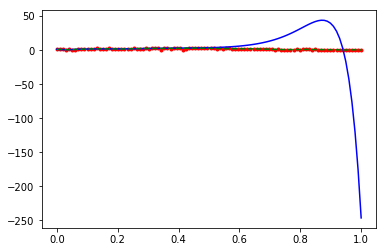

In [399]:
def poly_solve(n): 
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    x_inv = spy.linalg.inv(A.T@A)@A.T@yk
    fe_inv = spy.linalg.norm(A@x_inv - yk)
    Q,R =  spy.linalg.qr(A,mode ='economic')
    x_qr = spy.linalg.solve_triangular(R,Q.T@yk)
    fe_qr = spy.linalg.norm(A@x_qr - yk)
#     x_val =  np.linspace(np.min(xk)-1,np.max(xk)+1,n)
#     poly_inv = np.polyval(A,x_inv)
#     poly_qr = np.polyval(A,x_qr)
    plt.plot(xk,yk,'r.')
    plt.plot(xk,A@x_inv,'b')
    plt.plot(xk,A@x_qr,'g--')
    return fe_inv,fe_qr
poly_solve(23)


(396.94219827796326, 4.568370941902039)

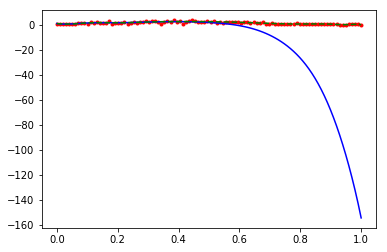

In [398]:
poly_solve(14)

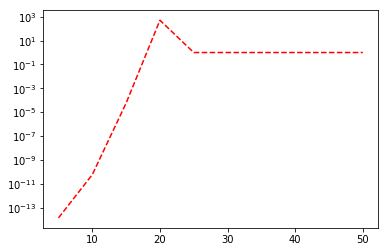

In [185]:
import math
def cat_can():
    nvals = np.arange(5,51,5)
    x = sy.Symbol('x')
    err = []
    for i in nvals:
        con_integral = sy.integrate(x**i * sy.exp(x - 1), (x, 0, 1))
        d_integral = (-1)**i * sy.subfactorial(i) + (-1)**(i + 1) * sy.factorial(i) / math.e
        err.append(abs(d_integral - con_integral) / abs(con_integral))
    plt.plot(nvals, err,'r--')
    plt.yscale('log')
sy.integrate

cat_can()